## 非监督学习应用练习

---

本次挑战中，我们将对数据降维和聚类方法的工作原理进行练习。

我们将使用三星提供的 [<i class="fa fa-external-link-square" aria-hidden="true"> Human Activity Recognition 活动识别数据集</i>](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) 。这些数据来自三星 Galaxy S3 手机的加速度计和陀螺仪，你可以通过上面的链接找到有关这些功能的更多信息）。这些活动类型包括：走路，站立，躺下，坐着或爬楼梯。

接下来的挑战过程中，我们首先假装不了解活动的类型，并尝试纯粹基于特征对样本进行聚类。然后，我们将确定身体活动类型的问题解决为分类问题。

我们先导入本次挑战可能会用到的模块和函数。

In [1]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

RANDOM_STATE = 17

然后，加载并读取数据集。

In [ ]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/1283/samsung_HAR.zip"
!unzip -o "samsung_HAR.zip"

In [3]:
PATH_TO_SAMSUNG_DATA = "./samsung_HAR"
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                 "samsung_test_labels.txt")).astype(int)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352,), (2947,))

聚类挑战中，我们不需要目标向量。所以，下面合并训练和测试样本：

In [4]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

X.shape, y.shape

((10299, 561), (10299,))

我们尝试查看类别数据中唯一值有哪些，并得到数据集目标类别的数量 `n_classes`。

In [5]:
n_classes = np.unique(y).size
np.unique(y)

array([1, 2, 3, 4, 5, 6])

根据 [<i class="fa fa-external-link-square" aria-hidden="true"> 数据集说明</i>](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)，我们可以得知类别数值表示的含义：

- 1 – walking
- 2 – walking upstairs
- 3 – walking downstairs
- 4 – sitting
- 5 – standing
- 6 – laying down

然后，尝试使用 `StandardScaler` 完成特征数据的规范化：

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(10299, 561)

接下来，我们将应用主成分分析 PCA 降维来缩减特征的数量。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>如果使用 PCA 降维，并使得缩减后的数据保留原始数据 90% 的方差，那么得到的特征数量是多少个？【65】

请使用挑战一开始定义好的 RANDOM_STATE 常量。

In [7]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(10299, 65)

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>降维后的第一主成分涵盖了多大比例的方差？舍入到最接近的百分比。【51】

In [8]:
round(float(pca.explained_variance_ratio_[0] * 100))

51

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>请绘制前两个主成分特征的二维散点图，并使用数据已知类别进行着色。

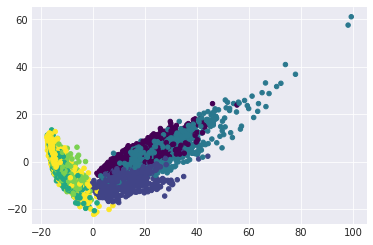

In [9]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis')

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>通过肉眼观察，上图大致分为几个聚类簇？不同簇中又包含哪些类型的活动？【B】

- 【A】 1 个簇：6 种类别的活动。
- 【B】 2 个簇：`walking, walking upstairs, walking downstairs` 和 `sitting, standing, laying`。
- 【C】 3 个簇：`walking` 和 `walking upstairs, walking downstairs` 和 `sitting, standing, laying`。
- 【D】 6 个簇。

接下来，请使用 KMeans 聚类方法对 PCA 降维后的数据进行聚类操作。于此同时，这里建议聚集为 6 类，实际上在正常情况下我们一般并不会知道聚为几类。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>建立 KMeans 聚类，设置 `n_clusters=n_classes`, `n_init=100` 以及前面提供的 RANDOM_STATE。

In [10]:
kmeans = KMeans(n_clusters=n_classes, n_init=100,
                random_state=RANDOM_STATE, n_jobs=1)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>同样，请使用 PCA 前面 2 个主成分特征绘制二维图像，但这一次使用 KMeans 聚类标签进行着色。

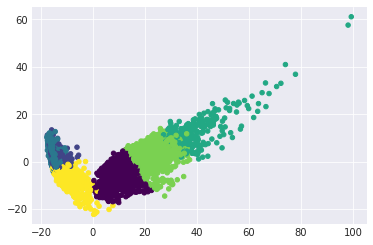

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20, cmap='viridis')

你可以对比查看原始标签分布和 KMeans 聚类标签的分布之间的不同之出。接下来，我们分别查看每个原始类别都被 KMeans 聚类划分成了那几个簇。

In [12]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
             'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,903,0,0,78,741,0,1722
going up the stairs,1241,0,0,5,296,2,1544
going down the stairs,320,0,0,196,890,0,1406
sitting,1,1235,91,0,0,450,1777
standing,0,1344,0,0,0,562,1906
laying,5,52,1558,0,0,329,1944
all,2470,2631,1649,279,1927,1343,10299


表格行名称是原始标签，而列名称则对应了 KMeans 聚类后的簇序号。可以看到，几乎每一个原始类别都被重新聚为了几个分散簇。

这里，我们使用某一原始类别被 KMeans 聚类后的最大数量簇，除以原始类别总数来表征聚类的分散程度。得到的数值越小，即代表聚类后的簇越分散。

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cluster1</th>
      <th>cluster2</th>
      <th>cluster3</th>
      <th>cluster4</th>
      <th>cluster5</th>
      <th>cluster6</th>
      <th>all</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>walking</th>
      <td>903</td>
      <td>0</td>
      <td>0</td>
      <td>78</td>
      <td>741</td>
      <td>0</td>
      <td>1722</td>
    </tr>
    <tr>
      <th>going up the stairs</th>
      <td>1241</td>
      <td>0</td>
      <td>0</td>
      <td>5</td>
      <td>296</td>
      <td>2</td>
      <td>1544</td>
    </tr>
    <tr>
      <th>going down the stairs</th>
      <td>320</td>
      <td>0</td>
      <td>0</td>
      <td>196</td>
      <td>890</td>
      <td>0</td>
      <td>1406</td>
    </tr>
    <tr>
      <th>sitting</th>
      <td>1</td>
      <td>1235</td>
      <td>91</td>
      <td>0</td>
      <td>0</td>
      <td>450</td>
      <td>1777</td>
    </tr>
    <tr>
      <th>standing</th>
      <td>0</td>
      <td>1344</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>562</td>
      <td>1906</td>
    </tr>
    <tr>
      <th>laying</th>
      <td>5</td>
      <td>52</td>
      <td>1558</td>
      <td>0</td>
      <td>0</td>
      <td>329</td>
      <td>1944</td>
    </tr>
    <tr>
      <th>all</th>
      <td>2470</td>
      <td>2631</td>
      <td>1649</td>
      <td>279</td>
      <td>1927</td>
      <td>1343</td>
      <td>10299</td>
    </tr>
  </tbody>
</table>

例如，所示的表格。walking 被重新划分为 cluster1, cluster4, cluster5。其中，数量最多的是 cluster1，则分散程度：

$$ \frac{903}{1722} = 0.524$$

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>请计算各原始类别聚类后的分散程度，并按照分散程度由大到小排序。

In [13]:
pd.Series(tab.iloc[:-1, :-1].max(axis=1).values /
          tab.iloc[:-1, -1].values, index=tab.index[:-1]).sort_values()

walking                  0.524390
going down the stairs    0.633001
sitting                  0.694992
standing                 0.705142
laying                   0.801440
going up the stairs      0.803756
dtype: float64

接下来，请使用实验中介绍的方法，通过求解观测数据点与其所在的簇的质心之间的平方距离之和来选择本次数据的最佳聚类 K 值。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>选择 KMeans 聚类合适的聚类 K 值。

In [14]:
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100,
                    random_state=RANDOM_STATE, n_jobs=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

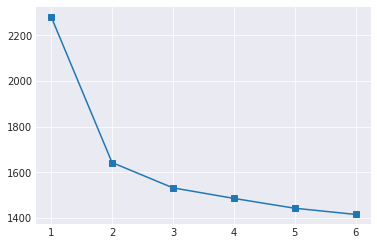

In [15]:
plt.plot(range(1, 7), inertia, marker='s')

In [16]:
d = {}
for k in range(2, 6):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

In [17]:
d

{2: 0.17344753560094145,
 3: 0.4168864953986749,
 4: 0.9332154094478505,
 5: 0.629704011371569}

不出意外时，这里的最佳聚类 K 值应该为 2，也就是将数据聚集为 2 类。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>接下来，尝试使用 Agglomerative 聚类，并计算二者（KMeans）的兰德指数 ARI 值。

这里使用 `n_clusters=n_classes` 时得到的 KMeans 聚类结果即可。

In [18]:
ag = AgglomerativeClustering(n_clusters=n_classes, linkage='ward').fit(X_pca)

In [19]:
print('KMeans: ARI =', metrics.adjusted_rand_score(y, cluster_labels))
print('Agglomerative CLustering: ARI =',
      metrics.adjusted_rand_score(y, ag.labels_))

KMeans: ARI = 0.4198070012602345
Agglomerative CLustering: ARI = 0.49362763373004886


一般情况下，ARI 值越高代表聚类效果越好。

-------------------------------

<div style="background-color: #e6e6e6; margin-bottom: 10px; padding: 1%; border: 1px solid #ccc; border-radius: 6px;text-align: center;"><a href="https://nbviewer.jupyter.org/github/shiyanlou/mlcourse-answers/tree/master/" title="挑战参考答案"><i class="fa fa-file-code-o" aria-hidden="true"> 查看挑战参考答案</i></a></div>

-------------------------------

<img src="https://img.shields.io/badge/实验楼-开放机器学习课程-green.svg?style=popout-square">